In [1]:
import matplotlib.pyplot as plt
import geopandas
import shapely.wkt
import pandas as pd
import csv
import re

In [2]:
states = geopandas.read_file('data/bound_p.shx')

df = pd.read_csv ('data/faa_artcc_polygons.csv')
df2 = pd.read_csv ('data/spaceports.csv')
df3 = pd.read_csv ('data/AirportData_Clean_20210629_Geocoded.csv')

P = [shapely.wkt.loads(h) for h in df['boundary']]

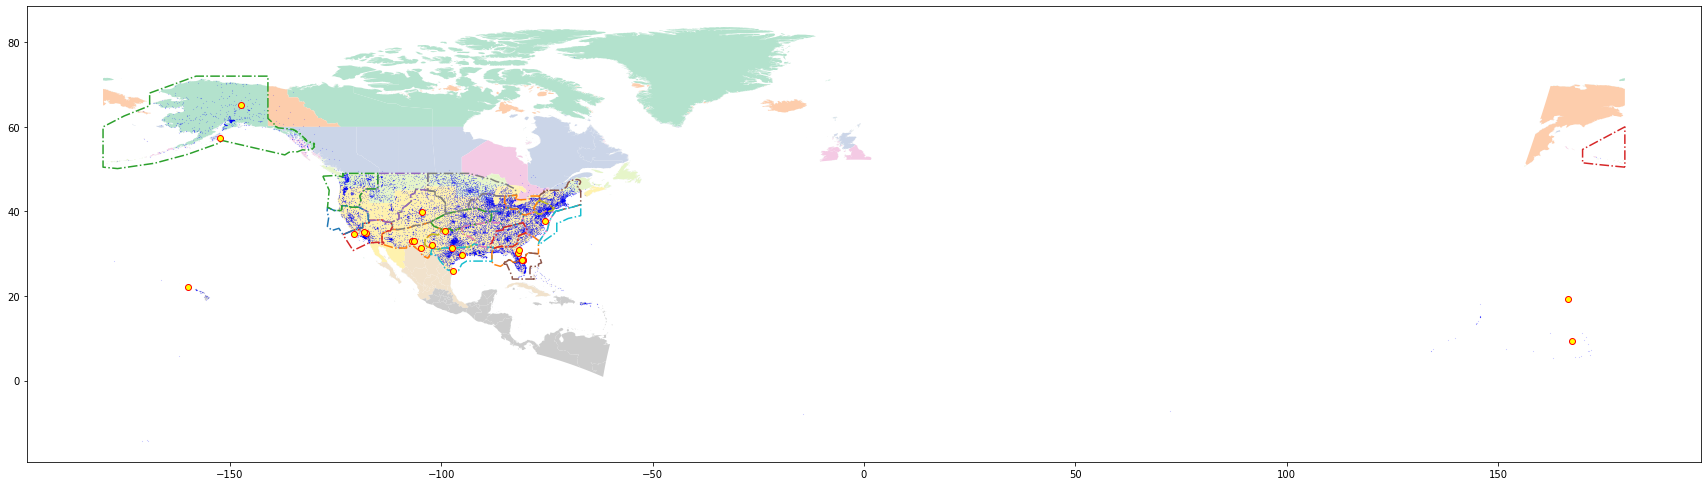

In [3]:
states.plot(cmap='Pastel2', figsize=(30, 10))

plt.plot(df3['longitude_degrees'], df3['latitude_degrees'], marker="o", markeredgecolor="blue", markerfacecolor="black", markersize=.07, linestyle="None")

for item in P:
    x,y = item.exterior.xy
    plt.plot(x,y, linestyle="dashdot")

plt.plot(df2['LONGITUDE'], df2['LATITUDE'], marker="o", markeredgecolor="red", markerfacecolor="yellow", linestyle="None")

In [6]:
msg = 'NAV ILS RWY 27 LOC/GP OUT OF SERVICE'

In [24]:
abbrev_dict = {}

with open('data/Contractions (Clean).csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader)
    abbrev_dict = {rows[0]:rows[1] for rows in reader}
    
def expandNotam(msg):
    new_string = re.sub(r"[^a-zA-Z0-9]"," ",str(msg))
    new_msg = ''
    for wrd in new_string.split():        
        try:
            new_msg = new_msg + ' ' + abbrev_dict[wrd]
        except:
            new_msg = new_msg + ' ' + wrd
    return new_msg.lower().strip()

In [25]:
expandNotam(msg)

'navigation instrument landing system runway 27 locally glide path out of service'

In [26]:
df4 = pd.read_csv('data/notams.csv', on_bad_lines='skip', encoding='utf-16')

/var/folders/cj/0ysqssvs12l97gk55z1vr2mdk43v6z/T/ipykernel_94738/3088472792.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('data/notams.csv', on_bad_lines='skip', encoding='utf-16')


In [28]:
df4['TEXT'] = df4['TEXT'].apply(expandNotam)

In [33]:
for x in df4['TEXT'].head(10):
    print(x)

airspace volk south military operations area active 500ft up to but not including fl180
airspace volk east military operations area active 8000ft up to but not including fl180
airspace falls 1 military operations area active 500ft up to but not including fl180
airspace falls 2 military operations area active 500ft up to but not including fl180
airspace volk west military operations area active 100ft up to but not including fl180
instrument landing system sv 109 5 mhz runway 03 intensity unknown (weather reports only) south or southern latitude
cyqy instrument landing system 07 intensity unknown (weather reports only) south or southern latitude
runway 17 35 closed except crossing
airspace jackal military operations area active 11000ft up to but not including fl180
airspace jackal low military operations area active 100ft 10999ft
